# Importando os dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
Penalti_dataset = pd.read_excel("Penalti.xlsx")
Penalti_dataset.head(50)

,ID_Batedor,Nome_Batedor,Pe,Posicao,Resultado,Ocasiao,Forca,ID_Goleiro,Nome_Goleiro,Lado_Certo,Defesa
0,1,Raphael Veiga,E,5,1,Copa,1,1,Diego Alves,0,0
1,2,Arrascaeta,D,1,1,Copa,1,2,Weverton,1,0
2,3,Gustavo Gomez,D,2,1,Copa,0,1,Diego Alves,0,0
3,4,Filipe Luis,E,10,0,Copa,0,2,Weverton,0,0
4,5,Gustavo Scarpa,E,4,1,Copa,1,1,Diego Alves,0,0
5,6,Matheuzinho,D,1,0,Copa,1,2,Weverton,1,1
6,7,Luan,D,5,0,Copa,0,1,Diego Alves,1,1
7,8,Vitinho,D,4,1,Copa,1,2,Weverton,0,0
8,9,Danilo,E,10,0,Copa,1,1,Diego Alves,1,0
9,10,Gabriel Barbosa,E,1,1,Copa,1,2,Weverton,1,0


# Entendendo os dados

O ponto mais importante do estudo seria verificar quais são os fatores que mais influenciam na cobrança do penâlti e assim conseguir realizar uma modelagem para simular cobranças. Nesse sentido, em face dos dados obtidos, há também a possibilidade de obter estatísiticas do futebol brasileiro, tanto pelo batedor quanto do goleiro.

In [ ]:
Penalti_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID_Batedor    135 non-null    int64 
 1   Nome_Batedor  135 non-null    object
 2   Pe            135 non-null    object
 3   Posicao       135 non-null    int64 
 4   Resultado     135 non-null    int64 
 5   Ocasiao       135 non-null    object
 6   Forca         135 non-null    int64 
 7   ID_Goleiro    135 non-null    int64 
 8   Nome_Goleiro  135 non-null    object
 9   Lado_Certo    135 non-null    int64 
 10  Defesa        135 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 11.7+ KB


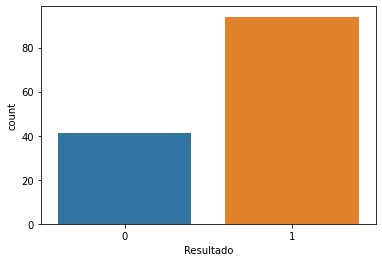

In [ ]:
sns.countplot(x="Resultado",data= Penalti_dataset)

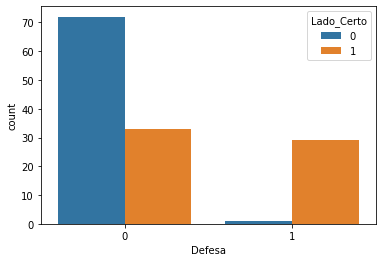

In [ ]:
sns.countplot(x="Defesa", hue="Lado_Certo", data= Penalti_dataset)

In [ ]:
Penalti_dataset.describe()

,ID_Batedor,Posicao,Resultado,Forca,ID_Goleiro,Lado_Certo,Defesa
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,35.481481,3.844444,0.696296,0.585185,6.074074,0.459259,0.222222
std,20.435502,2.804226,0.461569,0.494525,6.357073,0.500193,0.417288
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,3.000000,1.000000,1.000000,4.000000,0.000000,0.000000
75%,47.000000,5.000000,1.000000,1.000000,12.000000,1.000000,0.000000
max,79.000000,10.000000,1.000000,1.000000,19.000000,1.000000,1.000000


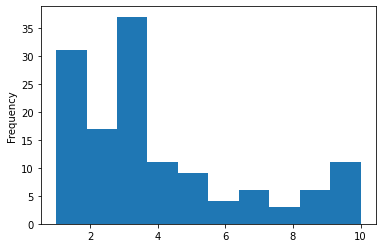

In [ ]:
Penalti_dataset['Posicao'].plot.hist()

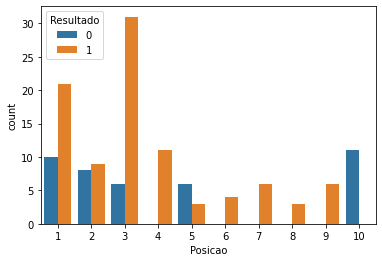

In [ ]:
sns.countplot(x="Posicao", hue="Resultado", data= Penalti_dataset)

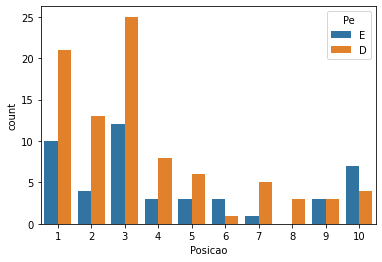

In [ ]:
sns.countplot(x="Posicao", hue="Pe", data= Penalti_dataset)

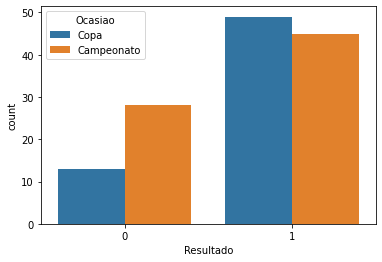

In [ ]:
sns.countplot(x='Resultado', hue="Ocasiao", data= Penalti_dataset)

In [ ]:
Penalti_dataset = Penalti_dataset.sort_values(by='ID_Batedor',ignore_index= True)


# Preparando os dados

In [ ]:
Penalti_dataset.isnull()

,ID_Batedor,Nome_Batedor,Pe,Posicao,Resultado,Ocasiao,Forca,ID_Goleiro,Nome_Goleiro,Lado_Certo,Defesa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
130,False,False,False,False,False,False,False,False,False,False,False
131,False,False,False,False,False,False,False,False,False,False,False
132,False,False,False,False,False,False,False,False,False,False,False
133,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
torneio = pd.get_dummies(Penalti_dataset['Ocasiao'])
PeDaCobranca = pd.get_dummies(Penalti_dataset['Pe'])
Penalti_dataset['Gol'] = Penalti_dataset['Resultado']


In [ ]:
Penalti_dataset = pd.concat([PeDaCobranca,torneio,Penalti_dataset],axis=1)

In [ ]:
Penalti_dataset.drop(['Pe', 'Ocasiao', 'ID_Batedor','Nome_Batedor','ID_Goleiro','Nome_Goleiro', 'Resultado'], axis=1, inplace=True)

In [ ]:
Penalti_dataset

,D,E,Campeonato,Copa,Posicao,Forca,Lado_Certo,Defesa,Gol
0,0,1,0,1,5,1,0,0,1
1,1,0,0,1,1,1,1,0,1
2,1,0,0,1,2,0,0,0,1
3,0,1,0,1,10,0,0,0,0
4,0,1,0,1,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...
130,0,1,0,1,9,1,0,0,1
131,1,0,0,1,1,1,1,0,1
132,1,0,0,1,8,1,0,0,1
133,1,0,0,1,2,1,1,1,0


# Modelagem

In [ ]:
X = Penalti_dataset.iloc[:,:-1]
y = Penalti_dataset.iloc[:,-1]

In [ ]:
from sklearn.model_selection  import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
y_score = logmodel.predict_proba(X_test)[:,1]
y_score

array([0.11179538, 0.11179538, 0.56376833, 0.61484802, 0.99315534,
       0.99281435, 0.56376833, 0.98677968, 0.86588686, 0.98727916,
       0.57834619, 0.77798681, 0.16199178, 0.99113896, 0.13531622,
       0.99315534, 0.30381177, 0.77798681, 0.99414773, 0.98677968,
       0.39776853, 0.39776853, 0.19149744, 0.4106829 , 0.98114386,
       0.8618474 , 0.98927037, 0.30381177, 0.99546714, 0.90423218,
       0.98911419, 0.94810377, 0.98916433, 0.94810377, 0.98361566,
       0.97022364, 0.991169  , 0.99155878, 0.98669442, 0.1345557 ,
       0.98677968, 0.99155878, 0.98669442, 0.95723753, 0.61484802,
       0.72854037, 0.98455726, 0.4267534 , 0.56376833, 0.95723753,
       0.97133044, 0.11179538, 0.19149744, 0.97993109])

# Avaliação

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [ ]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      0.61      0.76        23\n           1       0.78      1.00      0.87        31\n\n    accuracy                           0.83        54\n   macro avg       0.89      0.80      0.81        54\nweighted avg       0.87      0.83      0.82        54\n'

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

array([[14,  9],
       [ 0, 31]])

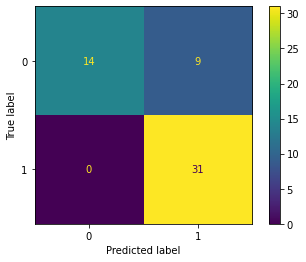

In [ ]:
plot_confusion_matrix(logmodel, X_test,y_test, xticks_rotation='horizontal')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)*100

83.33333333333334

In [ ]:
incorrect_pred = (y_test != predictions).sum()
incorrect_pred

9

In [ ]:
correct_pred = (y_test == predictions).sum()
correct_pred

45

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_score)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

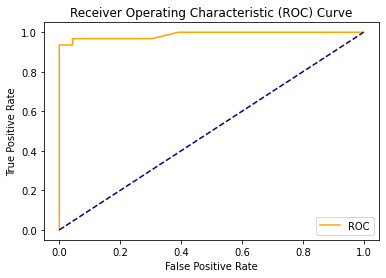

In [ ]:
plot_roc_curve(fpr,tpr)